# Setup

In [1]:
import sys
from pathlib import Path

PROJECT_ROOT = Path.cwd().parent #current working directory's parent folder
DATA_DIR = PROJECT_ROOT / "data"
DATA_DIR1= Path.cwd()
sys.path.insert(0, str(PROJECT_ROOT)) #sys.path is a list of directories where Python looks for modules, Python checks your project first when importing

# Optional: verify
print(sys.path)
print(PROJECT_ROOT)
print(DATA_DIR)
print(DATA_DIR1)

['c:\\Users\\user\\Desktop\\sfs_reports', 'C:\\Users\\user\\Downloads\\chromedriver_win32\\chromedriver.exe', 'C:\\Users\\user\\miniconda3\\python313.zip', 'C:\\Users\\user\\miniconda3\\DLLs', 'C:\\Users\\user\\miniconda3\\Lib', 'C:\\Users\\user\\miniconda3', 'c:\\Users\\user\\Desktop\\sfs_reports\\venv', '', 'c:\\Users\\user\\Desktop\\sfs_reports\\venv\\Lib\\site-packages']
c:\Users\user\Desktop\sfs_reports
c:\Users\user\Desktop\sfs_reports\data
c:\Users\user\Desktop\sfs_reports\notebooks


In [2]:
# Auto-reload, Whenever I edit a Python file, automatically reload it before running my next cell, #Enable the auto-reload feature in this notebook kernel, #Reload ALL imported modules automatically
%load_ext autoreload    
%autoreload 2           

# Load Data

In [3]:
import pandas as pd
import numpy as np
import altair as alt
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [4]:
import os
os.listdir()

['sfs_report.ipynb']

In [5]:
from sfs_lib.utils import clean_execution_report, duplicate_tcs, get_duplicate_summary

In [6]:
df = pd.read_csv(DATA_DIR / "Execution_Report.csv")
df.head()

,StartingProcessName,Title,StartTime,EndTime,ElapsedTime,Status,CreatedBy,CreatedDate,ModifiedBy,ModifiedDate
0,RT_TC_338125,"RT_TC_338125 - January 23, 2026 13:30:37",1/23/2026 1:30:53 PM,1/23/2026 1:30:53 PM,0.0000,Pending,WorksoftCertifyAgent,1/23/2026 1:31:00 PM,WorksoftCertifyAgent,1/23/2026 1:31:00 PM
1,RT_TC_338125,"RT_TC_338125 - January 23, 2026 13:36:54",1/23/2026 1:37:11 PM,1/23/2026 1:37:11 PM,0.0000,Pending,WorksoftCertifyAgent,1/23/2026 1:37:00 PM,WorksoftCertifyAgent,1/23/2026 1:37:00 PM
2,RT_TC_338125,"RT_TC_338125 - January 23, 2026 13:50:36",1/23/2026 1:50:52 PM,1/23/2026 1:50:52 PM,0.0000,Pending,WorksoftCertifyAgent,1/23/2026 1:51:00 PM,WorksoftCertifyAgent,1/23/2026 1:51:00 PM
3,RT_TC_338125,"RT_TC_338125 - January 23, 2026 13:57:25",1/23/2026 1:57:41 PM,1/23/2026 1:57:41 PM,0.0000,Pending,WorksoftCertifyAgent,1/23/2026 1:58:00 PM,WorksoftCertifyAgent,1/23/2026 1:58:00 PM
4,RT_TC_338125,"RT_TC_338125 - January 25, 2026 11:20:55",1/25/2026 11:21:19 AM,1/25/2026 11:30:04 AM,524.8021,passed,WorksoftCertifyAgent,1/25/2026 11:21:00 AM,WorksoftCertifyAgent,1/25/2026 11:30:00 AM


In [23]:
x=df['StartTime'].str.contains('/')
x

0      True
1      True
2      True
3      True
4      True
       ... 
295    True
296    True
297    True
298    True
299    True
Name: StartTime, Length: 300, dtype: bool

In [12]:
df['Status']=df['Status'].replace('passed','Passed')
df['Status']=df['Status'].replace('failed','Failed')
df.head()

,StartingProcessName,Title,StartTime,EndTime,ElapsedTime,Status,CreatedBy,CreatedDate,ModifiedBy,ModifiedDate
0,RT_TC_338125,"RT_TC_338125 - January 23, 2026 13:30:37",1/23/2026 1:30:53 PM,1/23/2026 1:30:53 PM,0.0000,Pending,WorksoftCertifyAgent,1/23/2026 1:31:00 PM,WorksoftCertifyAgent,1/23/2026 1:31:00 PM
1,RT_TC_338125,"RT_TC_338125 - January 23, 2026 13:36:54",1/23/2026 1:37:11 PM,1/23/2026 1:37:11 PM,0.0000,Pending,WorksoftCertifyAgent,1/23/2026 1:37:00 PM,WorksoftCertifyAgent,1/23/2026 1:37:00 PM
2,RT_TC_338125,"RT_TC_338125 - January 23, 2026 13:50:36",1/23/2026 1:50:52 PM,1/23/2026 1:50:52 PM,0.0000,Pending,WorksoftCertifyAgent,1/23/2026 1:51:00 PM,WorksoftCertifyAgent,1/23/2026 1:51:00 PM
3,RT_TC_338125,"RT_TC_338125 - January 23, 2026 13:57:25",1/23/2026 1:57:41 PM,1/23/2026 1:57:41 PM,0.0000,Pending,WorksoftCertifyAgent,1/23/2026 1:58:00 PM,WorksoftCertifyAgent,1/23/2026 1:58:00 PM
4,RT_TC_338125,"RT_TC_338125 - January 25, 2026 11:20:55",1/25/2026 11:21:19 AM,1/25/2026 11:30:04 AM,524.8021,Passed,WorksoftCertifyAgent,1/25/2026 11:21:00 AM,WorksoftCertifyAgent,1/25/2026 11:30:00 AM


In [21]:
df['StartTime']=pd.to_datetime(df['StartTime'], format="%m/%d/%Y %I:%M:%S %p")
df['EndTime']=pd.to_datetime(df['EndTime'], format="%m/%d/%Y %I:%M:%S %p")
df.head(12)


,StartingProcessName,Title,StartTime,EndTime,ElapsedTime,Status,CreatedBy,CreatedDate,ModifiedBy,ModifiedDate
0,RT_TC_338125,"RT_TC_338125 - January 23, 2026 13:30:37",2026-01-23 13:30:53,2026-01-23 13:30:53,0.0000,Pending,WorksoftCertifyAgent,1/23/2026 1:31:00 PM,WorksoftCertifyAgent,1/23/2026 1:31:00 PM
1,RT_TC_338125,"RT_TC_338125 - January 23, 2026 13:36:54",2026-01-23 13:37:11,2026-01-23 13:37:11,0.0000,Pending,WorksoftCertifyAgent,1/23/2026 1:37:00 PM,WorksoftCertifyAgent,1/23/2026 1:37:00 PM
2,RT_TC_338125,"RT_TC_338125 - January 23, 2026 13:50:36",2026-01-23 13:50:52,2026-01-23 13:50:52,0.0000,Pending,WorksoftCertifyAgent,1/23/2026 1:51:00 PM,WorksoftCertifyAgent,1/23/2026 1:51:00 PM
3,RT_TC_338125,"RT_TC_338125 - January 23, 2026 13:57:25",2026-01-23 13:57:41,2026-01-23 13:57:41,0.0000,Pending,WorksoftCertifyAgent,1/23/2026 1:58:00 PM,WorksoftCertifyAgent,1/23/2026 1:58:00 PM
4,RT_TC_338125,"RT_TC_338125 - January 25, 2026 11:20:55",2026-01-25 11:21:19,2026-01-25 11:30:04,524.8021,passed,WorksoftCertifyAgent,1/25/2026 11:21:00 AM,WorksoftCertifyAgent,1/25/2026 11:30:00 AM
5,RT_TC_366945,"RT_TC_366945 - January 25, 2026 11:20:55",2026-01-25 11:21:19,2026-01-25 11:33:30,730.9612,passed,WorksoftCertifyAgent,1/25/2026 11:21:00 AM,WorksoftCertifyAgent,1/25/2026 11:34:00 AM
6,RT_TC_173007,"RT_TC_173007 - January 25, 2026 11:21:35",2026-01-25 11:21:51,2026-01-25 11:38:01,969.6868,passed,WorksoftCertifyAgent,1/25/2026 11:22:00 AM,WorksoftCertifyAgent,1/25/2026 11:38:00 AM
7,RT_TC_178111,"RT_TC_178111 - January 25, 2026 11:30:41",2026-01-25 11:30:57,2026-01-25 11:41:45,648.5865,passed,WorksoftCertifyAgent,1/25/2026 11:31:00 AM,WorksoftCertifyAgent,1/25/2026 11:42:00 AM
8,RT_TC_128058,"RT_TC_128058 - January 25, 2026 11:32:19",2026-01-25 11:32:36,2026-01-25 11:43:36,659.6840,passed,WorksoftCertifyAgent,1/25/2026 11:33:00 AM,WorksoftCertifyAgent,1/25/2026 11:44:00 AM
9,RT_TC_337012,"RT_TC_337012 - January 25, 2026 11:34:05",2026-01-25 11:34:22,2026-01-25 11:54:25,1203.0428,passed,WorksoftCertifyAgent,1/25/2026 11:34:00 AM,WorksoftCertifyAgent,1/25/2026 11:54:00 AM


# Data Preprocessing

In [7]:
df_clean = clean_execution_report(df)
df_clean.head() #Raw Test data

,Process Name,Start Time,End Time,Elapsed Time,Status,Execution Date
0,RT_TC_338125,NaN,NaN,00:00:00,Pending,"January 23, 2026"
1,RT_TC_338125,NaN,NaN,00:00:00,Pending,"January 23, 2026"
2,RT_TC_338125,NaN,NaN,00:00:00,Pending,"January 23, 2026"
3,RT_TC_338125,NaN,NaN,00:00:00,Pending,"January 23, 2026"
4,RT_TC_338125,NaN,NaN,00:08:44,passed,"January 25, 2026"


In [9]:
df_dup_tc = duplicate_tcs(df_clean)
df_dup_tc.head() #Test Cases that are executed more than once

,Process Name,Start Time,End Time,Elapsed Time,Status,Execution Date
2,RT_TC_366945,11:53:00,12:01:00,00:08:38,failed,"January 11, 2026"
3,RT_TC_366945,12:02:00,12:14:00,00:12:03,passed,"January 11, 2026"
5,RT_TC_359203,NaN,NaN,00:06:39,passed,"January 13, 2026"
6,RT_TC_359203,14:49:00,14:53:00,00:04:14,failed,"January 11, 2026"
7,RT_TC_359203,14:54:00,14:59:00,00:04:12,failed,"January 11, 2026"


In [10]:
dup_dict, summary_df = get_duplicate_summary(df_dup_tc)
summary_df

Duplicate summary:
Test cases executed 5 times = 15
Test cases executed 4 times = 8
Test cases executed 3 times = 51
Test cases executed 2 times = 168


,Duplicate Count,Number of Test Cases
0,5,15
1,4,8
2,3,51
3,2,168


In [11]:
# Inspect rows executed 5 times
# if 5 in dup_dict:
#     dup_5 = dup_dict[5]
#     print(dup_5.head())

dup_5 = dup_dict[5]
dup_5.head()

,Process Name,Start Time,End Time,Elapsed Time,Status,Execution Date,dup_counts
65,RT_TC_338121,15:56:00,15:57:00,00:01:03,failed,"January 11, 2026",5
66,RT_TC_338121,15:58:00,15:59:00,00:01:03,failed,"January 11, 2026",5
67,RT_TC_338121,NaN,NaN,00:01:04,failed,"January 13, 2026",5
68,RT_TC_338121,NaN,NaN,00:02:29,failed,"January 14, 2026",5
69,RT_TC_338121,NaN,NaN,00:04:39,passed,"January 14, 2026",5


In [12]:
# Select the row with latest Execution Date among duplicate tcs or if the date are same select from the latest Elapsed Time
df_clean_1=df_dup_tc.sort_values(['Execution Date','End Time']).groupby("Process Name", as_index=False).tail(1)
df_clean_1.head() #Test cases selected with latest data


,Process Name,Start Time,End Time,Elapsed Time,Status,Execution Date
3,RT_TC_366945,12:02:00,12:14:00,00:12:03,passed,"January 11, 2026"
151,RT_TC_331023,12:09:00,12:16:00,00:07:36,passed,"January 11, 2026"
95,RT_TC_337350,12:21:00,12:26:00,00:04:41,failed,"January 11, 2026"
227,RT_TC_234104,12:26:00,12:29:00,00:02:29,failed,"January 11, 2026"
381,RT_TC_181222,12:15:00,12:36:00,00:21:15,passed,"January 11, 2026"


In [13]:
df_without_dup=df_clean[~df_clean["Process Name"].isin(df_dup_tc["Process Name"])]
print(f'No. of test cases executed only once= {df_without_dup.shape[0]}')

No. of test cases executed only once= 163


In [14]:
print(f'No. of test cases executed more than once= {df_clean_1.shape[0]}')

No. of test cases executed more than once= 106


In [15]:
df_final=pd.concat([df_without_dup, df_clean_1],axis=0)
print(f'Total no. of test cases executed = {df_final.shape[0]}')

Total no. of test cases executed = 269


In [108]:
df_final['Elapsed Time'] = pd.to_timedelta(df_final['Elapsed Time'])
total_time = df_final['Elapsed Time'].sum()
print(total_time)

2 days 05:16:58


In [110]:
days = total_time.days
hours = total_time.components.hours
minutes = total_time.components.minutes
seconds = total_time.components.seconds

formatted = f"{days} days {hours} hours {minutes} mts {seconds} secs"
formatted

'2 days 5 hours 16 mts 58 secs'

# Plot

In [16]:
df_final.head()

,Process Name,Start Time,End Time,Elapsed Time,Status,Execution Date
0,RT_TC_409787,21:17:00,22:01:00,00:43:16,passed,"January 11, 2026"
1,RT_TC_366946,16:56:00,17:07:00,00:10:47,passed,"January 11, 2026"
4,RT_TC_364246,05:33:00,05:41:00,00:07:54,passed,"January 12, 2026"
8,RT_TC_359201,18:48:00,19:02:00,00:13:16,passed,"January 11, 2026"
21,RT_TC_357027,13:46:00,14:07:00,00:20:32,passed,"January 11, 2026"


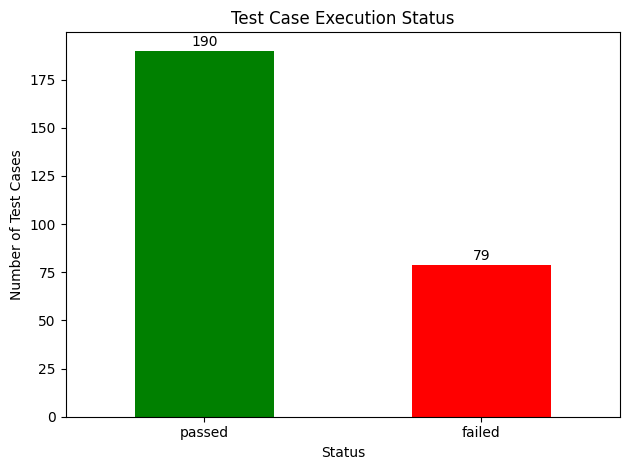

In [ ]:
## Compare Passed and Failed Test Cases
status_counts=df_final['Status'].value_counts()

colors = ['green', 'red'] 
# Plot bar chart
ax = status_counts.plot(kind="bar", color=colors)

# Add counts on top of bars
for bar in ax.patches:
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height() + 1,
        int(bar.get_height()),
        ha="center",
        va="bottom",
        fontsize=10
    )

# Labels and title
plt.title("Test Case Execution Status")
plt.xlabel("Status")
plt.ylabel("Number of Test Cases")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [100]:
status_counts=df_final['Status'].value_counts()
int(status_counts['passed'])

190

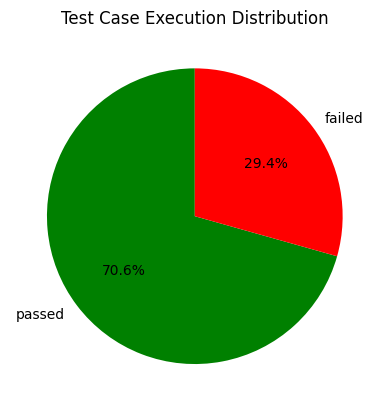

In [ ]:
# Define colors for each status
colors = ['green', 'red']  # Passed -> green, Failed -> red

# Plot pie chart with custom colors
status_counts.plot(
    kind="pie",
    autopct="%1.1f%%",
    colors=colors,
    startangle=90  # optional: rotate start for better aesthetics
)

plt.title("Test Case Execution Distribution")
plt.ylabel("")  # removes default ylabel
plt.show()

In [19]:
## Analyse the maximum time taken by each test case
df_final["Elapsed Time"] = pd.to_timedelta(df_final["Elapsed Time"])
df_final['Elapsed sec']=df_final['Elapsed Time'].dt.total_seconds()
df_final.head()


,Process Name,Start Time,End Time,Elapsed Time,Status,Execution Date,Elapsed sec
0,RT_TC_409787,21:17:00,22:01:00,0 days 00:43:16,passed,"January 11, 2026",2596.0
1,RT_TC_366946,16:56:00,17:07:00,0 days 00:10:47,passed,"January 11, 2026",647.0
4,RT_TC_364246,05:33:00,05:41:00,0 days 00:07:54,passed,"January 12, 2026",474.0
8,RT_TC_359201,18:48:00,19:02:00,0 days 00:13:16,passed,"January 11, 2026",796.0
21,RT_TC_357027,13:46:00,14:07:00,0 days 00:20:32,passed,"January 11, 2026",1232.0


In [87]:
df_final_passed=df_final[df_final['Status']=='passed']
df_final_passed

,Process Name,Start Time,End Time,Elapsed Time,Status,Execution Date,Elapsed sec
0,RT_TC_409787,21:17:00,22:01:00,0 days 00:43:16,passed,"January 11, 2026",2596.0
1,RT_TC_366946,16:56:00,17:07:00,0 days 00:10:47,passed,"January 11, 2026",647.0
4,RT_TC_364246,05:33:00,05:41:00,0 days 00:07:54,passed,"January 12, 2026",474.0
8,RT_TC_359201,18:48:00,19:02:00,0 days 00:13:16,passed,"January 11, 2026",796.0
21,RT_TC_357027,13:46:00,14:07:00,0 days 00:20:32,passed,"January 11, 2026",1232.0
...,...,...,...,...,...,...,...
353,RT_TC_186036,NaN,NaN,0 days 00:31:54,passed,"January 14, 2026",1914.0
375,RT_TC_183004,NaN,NaN,0 days 00:06:39,passed,"January 14, 2026",399.0
13,RT_TC_358121,NaN,NaN,0 days 00:23:09,passed,"January 15, 2026",1389.0
133,RT_TC_337012,NaN,NaN,0 days 00:19:54,passed,"January 15, 2026",1194.0


In [ ]:
df_sorted = df_final_passed.sort_values("Elapsed sec", ascending=False).reset_index()

def format_timedelta(td):
    total_seconds = int(td.total_seconds())
    hours = total_seconds // 3600
    minutes = (total_seconds % 3600) // 60
    seconds = total_seconds % 60
    result = ""
    if hours > 0:
        result += f"{hours} hr "
    if minutes > 0:
        result += f"{minutes} m "
    result += f"{seconds} sec"
    return result

df_sorted['Elapsed Time(H:M:S)'] = df_sorted['Elapsed Time'].apply(format_timedelta)


# Create bar chart
bar_fig = px.bar(
    df_sorted,
    x='Process Name',
    y='Elapsed sec',
    text='Elapsed sec',  # shows value on top
    labels={'Process Name':'Test Cases', 'Elapsed sec':'Time (seconds)'},
    title="Time Taken per Test Case (Max → Min)",
    color='Elapsed sec',
    color_continuous_scale='Viridis',
    hover_data={'Elapsed sec': True}
)

bar_fig.update_traces(texttemplate='%{text:.1f}', textposition='outside')
bar_fig.update_layout(xaxis_tickangle=-45)

# Create table
table = go.Figure(data=[go.Table(
    header=dict(values=["Process Name", "Elapsed Time (Hours, mts, seconds)"],
                fill_color='paleturquoise',
                align='left'),
    cells=dict(values=[df_sorted['Process Name'], df_sorted['Elapsed Time(H:M:S)']],
               fill_color='lavender',
               align='left'))
])

# Display bar chart
bar_fig.show()

# Display table
table.show()


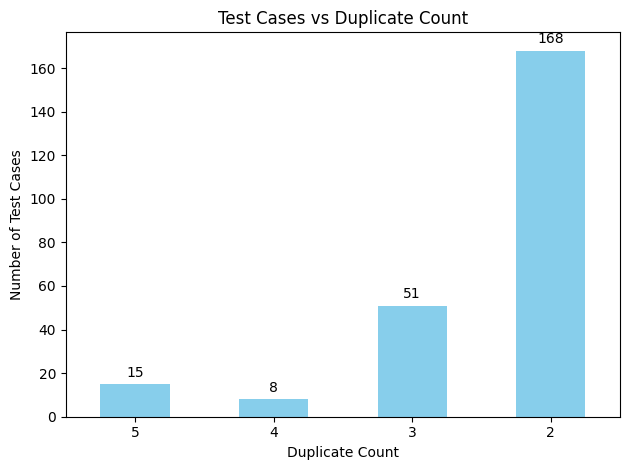

In [85]:
# Sort by Duplicate Count descending (optional)
df_dup = summary_df.sort_values('Duplicate Count', ascending=False)

# Plot bar chart
ax = df_dup.plot(
    kind='bar',
    x='Duplicate Count',
    y='Number of Test Cases',
    color='skyblue',
    legend=False
)

# Add counts on top of bars
for bar in ax.patches:
    ax.text(
        bar.get_x() + bar.get_width()/2,
        bar.get_height() + 2,
        int(bar.get_height()),
        ha='center',
        va='bottom',
        fontsize=10
    )

plt.title("Test Cases vs Duplicate Count")
plt.xlabel("Duplicate Count")
plt.ylabel("Number of Test Cases")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()
